<center><h1> 19MAT212</h1></center>
<center><h1>MATHEMATICS FOR INTELLIGENT SYSTEMS-4</h1></center>

### ANUVARSHINI.S.P-CB.EN.U4AIE19011
### PODURU RAMA SAILAJA-CB.EN.U4AIE19045

# STOCK PREDICTION



# Stock Price Dynamics

Modeling stock price dynamics is an important aspect of mathematical finance.  Simulating stock price movements allows an algorithmic trader to test different strategies.  Policy makers at the federal reserve can evaluate risk and volatility using similar models.  

It's important to keep in mind that every financial model contains assumptions and limitations.  Understanding these limitations is a crucial part of being a responsible practicioner.  At any rate, stochastic models are still a valuable tool for assessing risk and volatility.



## Brownian Motion in Python

Before we can model the closed form solution of GBM, we need to model the Brownian Motion.  This is the stochastic portion of the equation.  To do this we'll need to generate the standard random variables from the normal distribution $N(0,1)$.  Next, we'll multiply the random variables by the square root of the time step.  The final step is to perform a cumulative sum to generate the Brownian Motion.

The Brownian Motion $W_t$ is the random portion of the equation.  Each Brownian increment $W_i$ is computed by multiplying a standard random variable $z_i$ from a normal distribution $N(0,1)$ with mean $0$ and standard deviation $1$ by the square root of the time increment $\sqrt{\Delta t_i}$. $$ $$
$$ W_i = z_i \sqrt{\Delta t_i}$$

The cumulative sum of the Brownian increments is the discretized Brownian path.

$$W_{n}(t) = \sum_{i=1}^{n} W_i(t)$$



In [158]:
import numpy as np
import matplotlib.pyplot as plt


def Brownian(seed, N):
    
    np.random.seed(seed)                         
    dt = 1/N                                    # time step
    b = np.random.normal(0, 1, N)*np.sqrt(dt)  # brownian increments
    W = np.cumsum(b)                             # brownian path
    return W, b

N=100
seed=5
# brownian increments
b = Brownian(seed, N)[1]

# brownian motion
W = Brownian(seed, N)[0]
W=np.insert(W,0,0.)


If we plot the Brownian increments we can see that the numbers oscillate as white noise, while the plot of the Brownian Motion shows a path that looks similar to the movement of a stock price.

Text(0.5, 1.0, 'Brownian Increments')

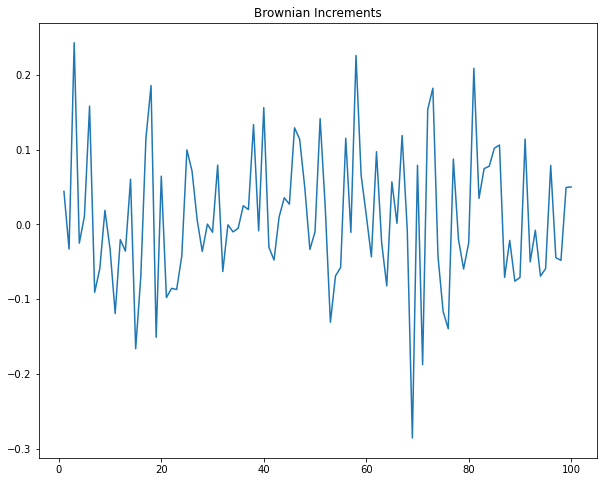

In [159]:
# brownian increments
%matplotlib inline
plt.rcParams['figure.figsize'] = (10,8)
xb = np.linspace(1, len(b), len(b))
plt.plot(xb, b)
plt.title('Brownian Increments')

Text(0.5, 1.0, 'Brownian Motion')

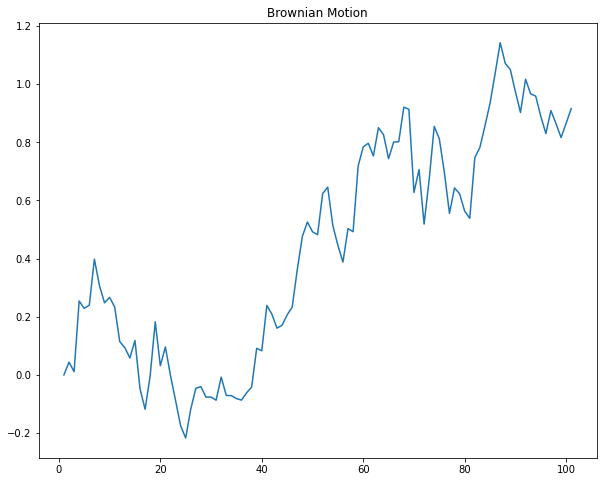

In [160]:
# brownian motion
xw = np.linspace(1, len(W), len(W))
plt.plot(xw, W)
plt.title('Brownian Motion')


## Geometric Brownian Motion
Simulations of stocks and options are often modeled using stochastic differential equations (SDEs).  Because of the randomness associated with stock price movements, the models cannot be developed using ordinary differential equations (ODEs).

A typical model used for stock price dynamics is the following stochastic differential equation:

$$dS = \mu S\ dt +\sigma S\ dW_t $$

where $S$  is the stock price, $\mu$ is the drift coefficient, $\sigma$ is the diffusion coefficient, and $W_t$ is the [Brownian Motion](https://en.wikipedia.org/wiki/Wiener_process).  

In stochastic version, the infinitesimal changes are given by GBM SDE which is random because of the presence of the Browinan motion. So at time t, our assumption is that we will know the value of process $S_t$.

$$E[d S_{t} ]=\mu S_{t} d t$$

As the mean of the brownian increments is 0, the mean of the infinitesimal changes is just mu times S_t times dt.

$$\begin{aligned} V[d S_{t} ] &=\sigma^{2} S_{t}^{2} V[d B_{t} ] \\ &=\sigma^{2} S_{t}^{2} d t \end{aligned}$$

The variance of scalar times a random variable is equal to square of the sclar times the variance of the random variable and we also know the variance of the
browian increments is equal to the length of the interval.

The mean and variance here refers to the infintesimal changes.


$$dS = \mu S\ dt +\sigma S\ dW_t $$
$$dS_{t}^{2}=\sigma^{2} S_{t}^{2} d t $$


By using the Itô's lemma equation,
$$
\begin{aligned}
d \ln S_{t} &=\frac{\partial \ln S_{t}}{\partial S_{t}} d S_{t}+\frac{1}{2} \frac{\partial^{2} \ln S_{t}}{\partial S_{t}^{2}} d S_{t}^{2} \\
&=\frac{1}{S_{t}} d S_{t}-\frac{1}{2} \frac{1}{S_{t}^{2}} d S_{t}^{2} \\
&=\frac{1}{S_{t}}\left(\mu S_{t} d t+\sigma S_{t} d W_{t}\right)-\frac{1}{2} \frac{1}{S_{t}^{2}} \sigma^{2} S_{t}^{2} d t \\
&=\mu d t+\sigma d W_{t}-\frac{1}{2} \sigma^{2} d t
\end{aligned}
$$

$$
\begin{array}{l}
d \ln S_{t}=\left(\mu-0.5 \sigma^{2}\right) d t+\sigma d W_{t} \\
\int_{0}^{T} d \ln S_{t}=\int_{0}^{T}\left(\mu-0.5 \sigma^{2}\right) d t+\int_{0}^{T} \sigma d W_{t} \\
\ln S_{T}-\ln S_{0}=\left(\mu-0.5 \sigma^{2}\right) \int_{0}^{T} d t+\sigma \int_{0}^{T} d W_{t} \\
\ln \frac{S_{T}}{S_{0}}=\left(\mu-0.5 \sigma^{2}\right) T+\sigma W_{T}
\end{array}
$$
We know that,
$$
e^{\ln x}=\ln e^{x}=x
$$


$$
\begin{array}{l}
\frac{S_{T}}{S_{0}}=e^{\left(\mu-0.5 \sigma^{2}\right) T+\sigma W_{T}} \\
S_{T}=S_{0} e^{\left(\mu-0.5 \sigma^{2}\right) T+\sigma W_{T}}
\end{array}
$$


For the SDE above with an initial condition for the stock price of $S(0) = S_{0}$, the closed form solution of [Geometric Brownian Motion](https://en.wikipedia.org/wiki/Geometric_Brownian_motion) (GBM) is:  

$$ S(t) = S_{0}e^{(\mu-\frac{1}{2}\sigma^2)t+\sigma W_t}$$

## GBM in Python
Now that we have a model of the Brownian Motion, we can put the pieces together by modeling the closed form solution of GBM:$$ $$ 
$$ S(t) = S_{0}e^{(\mu-\frac{1}{2}\sigma^2)t+\sigma W_t}$$

We'll start by making up some arbitrary returns and volatility, then then we'll use some actual stock returns to build a real model.

$\rightarrow$drift reflects the longer-term trend in stock prices.

$\rightarrow$diffusion reflects shorter-term fluctuations. 

The drift component is constant. We can’t create different scenarios out of it, but the diffusion component helps us create as many scenarios as we want since it involves Wiener process(It creates independent, stationary and normally distributed random shocks).


If there would only be the drift component, we would always know what the stock price will become in the next time point, but the diffusion component disturbs this smoothness by introducing random shock. So, we don’t observe a monotonous increase or decrease trend for the stock prices.

In modeling a stock price, the drift coefficient represents the mean of returns over some time period, and the diffusion coefficient represents the standard deviation of those same returns.  

Lets assume that the returns $\mu$ are $0.15$, and the volatility $\sigma$  is $0.4$.  We'll start with an initial stock price $S_0$ of $ 55.25 $.  Putting all of the pieces together, here's what the code looks like in Python:


In [143]:
# GBM Exact Solution

# Parameters
#
# So:     initial stock price
# mu:     returns (drift coefficient)
# sigma:  volatility (diffusion coefficient)
# W:      brownian motion
# T:      time period
# N:      number of increments

def GBM(So, mu, sigma, W, T, N):    
    t = np.linspace(0,1,N)
    #print(t)
    S = []
    S.append(So)
    for i in range(1,N):
        drift = (mu - (0.5 * (sigma)**2)) * t[i]
        diffusion = sigma * W[i-1]
        S_temp = So*(np.exp(drift + diffusion))
        S.append(S_temp)
    return S, t



Text(0, 0.5, 'Stock Price')

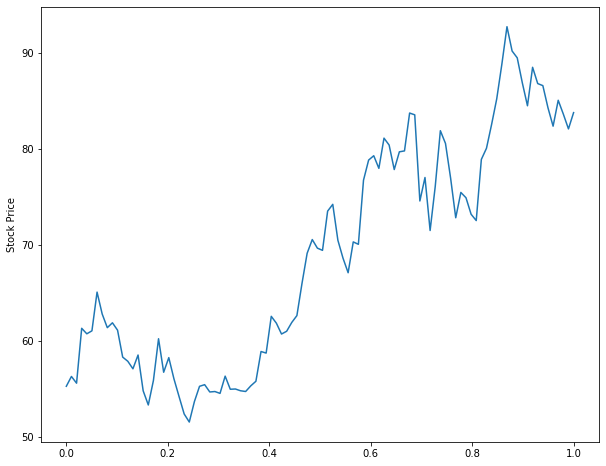

In [144]:
So = 55.25
mu = 0.15
sigma = 0.4
seed=5
W = Brownian(seed, N)[0]
T = 1
N = 100

soln = GBM(So, mu, sigma, W, T, N)[0]    # Exact solution
t = GBM(So, mu, sigma, W, T, N)[1]       # time increments for  plotting

plt.plot(t, soln)
plt.ylabel('Stock Price')


It's important to keep in mind that this is only one potential path.  If we change the seed of the random numbers to something else, say $22$, the shape is completely different.

Text(0.5, 1.0, 'Geometric Brownian Motion')

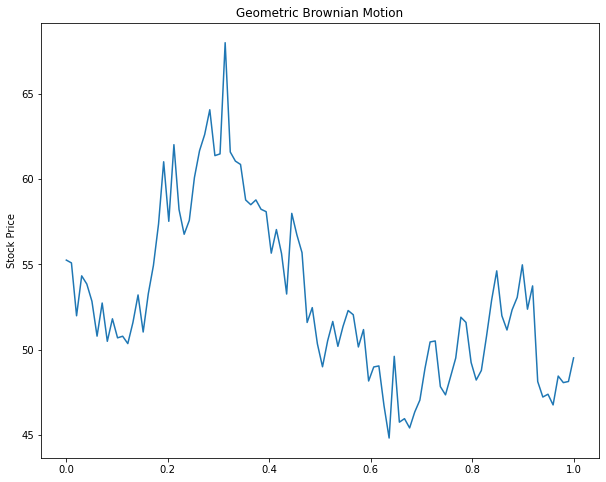

In [145]:
So = 55.25
mu = 0.15
sigma = 0.4
seed = 22
W = Brownian(seed, N)[0]
T = 1
N = 100

soln = GBM(So, mu, sigma, W, T, N)[0]    # Exact solution
t = GBM(So, mu, sigma, W, T, N)[1]       # time increments for  plotting

plt.plot(t, soln)
plt.ylabel('Stock Price')
plt.title('Geometric Brownian Motion')

In [146]:
import pandas as pd

In [147]:
df1=pd.read_csv('C:\\Users\\Anuvarshini\\Desktop\\sem 4\\MIS4 19MAT212\\project\\Quantitative-Finance-master\\Brownian Motion\\NSE-TATAGLOBAL11.csv')

In [148]:
df1.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05


In [149]:
len(df1)

1235

In [150]:
close=df1['Close']

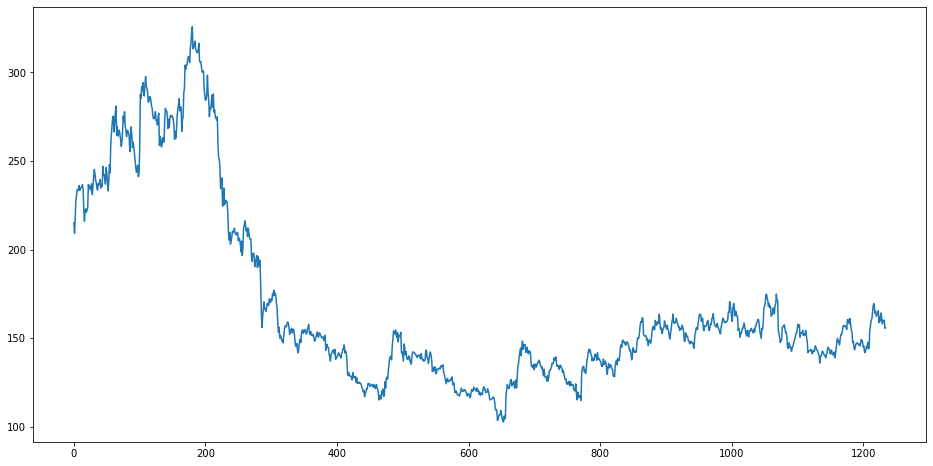

In [151]:
plt.figure(figsize=(16,8))
plt.plot(df1['Close'], label='Close Price history')

The daily return measures the change in a stock’s price as a percentage of the previous day’s closing price. A positive return means the stock has grown in value, while a negative return means it has lost value. A stock with lower positive and negative daily returns is typically less risky than a stock with higher daily returns, which create larger swings in value.


In order to build our GBM model, we'll need the drift and diffusion coefficients.  We can compute those from the daily returns using the following function:

In [152]:
def daily_return(close):
    returns = []
    for i in range(len(close)-1):
        today = close[i+1]
        yesterday = close[i]
        daily_return = (today - yesterday)/yesterday
        returns.append(daily_return)
    return returns



In [153]:
returns = daily_return(close)

mu = np.mean(returns)*len(df1)          # drift coefficient
sig = np.std(returns)*np.sqrt(len(df1))  # diffusion coefficient-votality

print (str(mu))
print(str(sig))


-0.08468110279860866
0.6919248406267521


The mean of the returns are multiplied by the number of trading days so that we can annualize returns.

Text(0.5, 1.0, 'Geometric Brownian Motion - Tata')

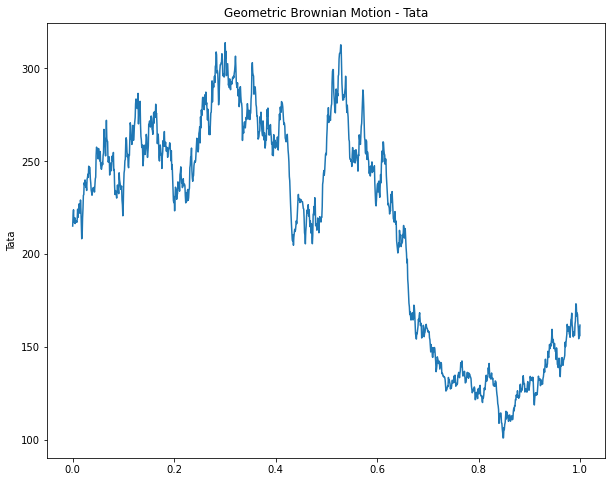

In [154]:
seed = 10
So = close[0]
N = len(df1)

W = Brownian(seed, len(df1))[0]

T = 1

soln = GBM(So, mu, sig, W, T, N)[0]    # Exact solution
#print(len(soln))
t = GBM(So, mu, sig, W, T, N)[1]       # time increments for  plotting
plt.plot(t, soln)
plt.ylabel('Tata')
plt.title('Geometric Brownian Motion - Tata')


In [155]:
close1=close.to_list()
print("Close"+"\t\t"+"soln")

for i in range(len(close1)):
    print(str(close1[i]) + '\t\t' + str(soln[i]))

Close		soln
215.15		215.15
209.2		220.807341502922
218.2		223.88021149888363
227.6		217.11366473955852
230.9		217.0208292932413
233.75		219.63438124619054
233.25		216.48555556667026
234.25		217.5630940579695
236.1		217.9713226156791
233.3		217.93250190233007
234.6		217.12757034584095
234.9		218.92918907715864
235.05		224.11793971598948
236.6		219.84188062804478
233.95		224.2792045924447
222.65		225.23192105886613
216.0		227.15494728493817
222.0		222.06965825710466
222.95		222.60284493335956
221.05		229.14518036804793
222.4		224.26598984097095
223.7		215.64435360748337
236.7		208.3131614095914
234.3		209.3523249240412
236.0		219.35990928943983
234.55		224.20832455852266
233.35		231.6541261721615
237.05		232.04584744620672
231.0		238.45905630946336
235.45		237.1266508246501
240.55		239.94391453237554
245.15		238.62167943561607
243.0		235.99281664821902
239.35		236.54812147831726
237.55		234.27936054553228
234.55		240.33031121373833
233.55		241.19151736932184
237.3		243.03572581104274
236

If we overlay the actual stock prices, we can see how our model compares.

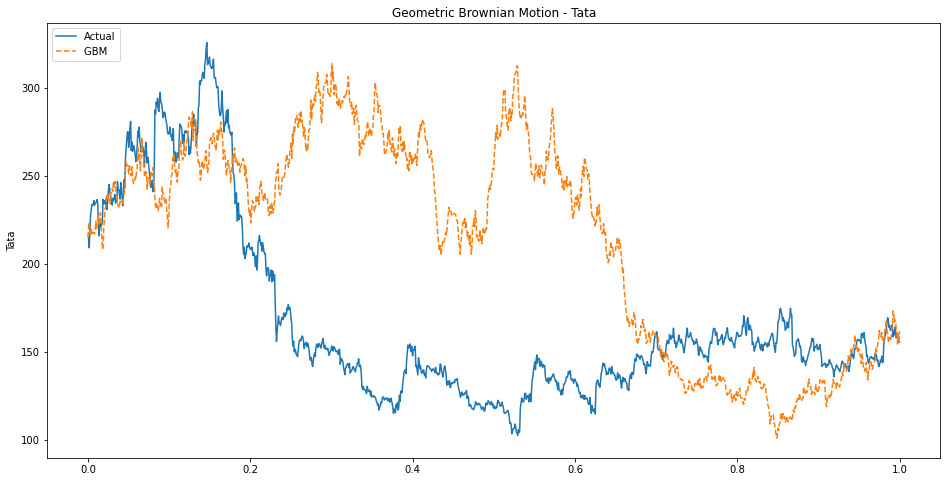

In [156]:
# adjusting the original time array from days to years
time = np.linspace(1, len(close), len(close))
time = [i/len(df1) for i in time]
plt.figure(figsize=(16,8))
plt.plot(time, close, label = 'Actual')
plt.plot(t, soln, label = 'GBM ', ls='--')

plt.ylabel('Tata')
plt.title('Geometric Brownian Motion - Tata')

plt.legend(loc = 'upper left')


We can also plot some other models with different random seeds to see how the path changes.

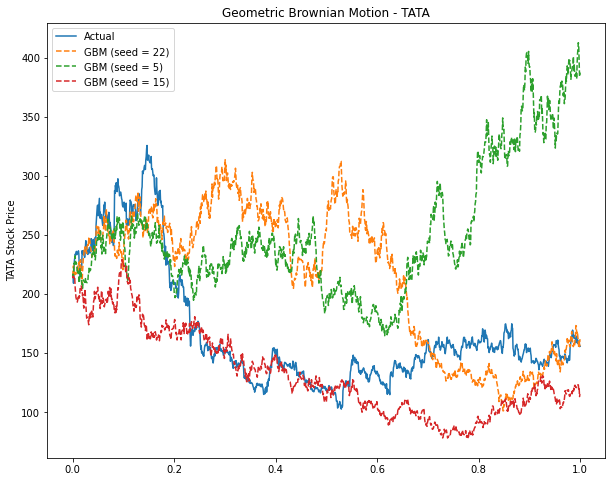

In [157]:
T = 1
N = len(df1)
So = close[0]

seed = 5
W = Brownian(seed, N)[0]
soln2 = GBM(So, mu, sig, W, T, N)[0]    

seed = 15
W = Brownian(seed, N)[0]
soln3 = GBM(So, mu, sig, W, T, N)[0]    

# adjusting the original time array from days to years
time = np.linspace(1, len(close), len(close))
time = [i/len(df1) for i in time]

plt.plot(time, close, label = 'Actual')
plt.plot(t, soln, label = 'GBM (seed = 22)', ls = '--')
plt.plot(t, soln2, label = 'GBM (seed = 5)', ls = '--')
plt.plot(t, soln3, label = 'GBM (seed = 15)', ls = '--')

plt.ylabel('TATA Stock Price')
plt.title('Geometric Brownian Motion - TATA')

plt.legend(loc = 'upper left')


We can see from the plot that depending on our random numbers generated, the path can take on any number of shapes.  Testing trading strategies against a large number of these simulations is a good idea because it shows how well our model is able to generalize.  If we were to fit a model on any one given path we would likely overfit our data.

It's also important to note the limitations of this model.  The returns and volatility are kept constant, but in actuality are probably more realistically modeled as stochastic processes.  

## Euler-Maruyama Approximation

The following SGD used for interest-rate models, which is known as the Langevin Equation, does not have a closed form solution:

$$ dS = -\mu S\ dt + \sigma\ dW_t $$

In this case, we need to use a numerical technique to approximate the solution.  One of the most straightforward approximations is the [Euler-Maruyama Method](https://en.wikipedia.org/wiki/Euler%E2%80%93Maruyama_method).


$$
S\left(t_{n+1}\right)=S\left(t_{n}\right)+\mu \int_{t_{n}}^{t_{n+1}} S(t) d t+\sigma \int_{t_{n}}^{t_{n+1}} S(t) d B(t)
$$ then, the euler scheme given by the approximation of the integrals is ,

$$
\int_{t_{i}}^{t_{i+1}} f(t) d t \approx \int_{t_{i}}^{t_{i+1}} f\left(t_{i}\right) d t=f\left(t_{i}\right) \cdot \Delta t_{i}
$$


$$w_{i+1} = w_i + \mu w_i \Delta t_i + \sigma w_i \Delta W_i$$

We will use this approximation as a verification of our model because we know what the closed-form solution is.  It's always good practice to verify a numerical approximation against a simplified model with a known solution before applying it to more complex models.  If the results agree well with the closed-form solution, we are probably solving the mathematical model correctly.
We choose $\Delta t_i$ values to be exact multiples of M so we can evaluate the processes at the same points.

In [129]:
def EM(So, mu, sigma, b, T, N, M):
    dt = M * (1/N)  # EM step size
    wi = [So]
    coarse_grid = np.arange(dt,1+dt,M*dt)
    for i in range(int(N/M)):
        Winc = np.sum(b[(M*(i-1)+M):(M*i + M)])
        w_i_new = wi[i]+mu*wi[i]*dt+sigma*wi[i]*Winc
        wi.append(w_i_new)
    return wi, dt

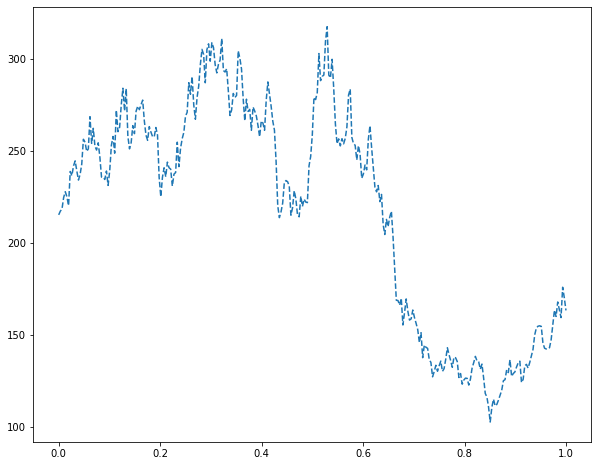

In [130]:
N=len(df1)
# Changing the time step sizes
#
# dt = 0.03125
seed=10
b = Brownian(seed, N)[1]    # Brownian increments 
M = 4                    
L = N//M
EM_approx_1 = EM(So, mu, sig, b, T, N, M)[0]
time_EM_1 = np.linspace(0,1,L+1)
plt.plot(time_EM_1, EM_approx_1, label = 'dt = 0.03125', ls ='--')

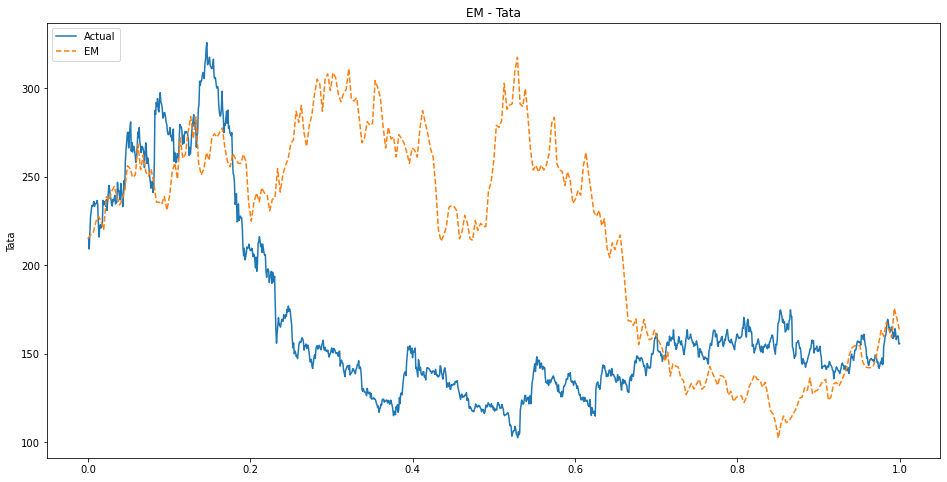

In [131]:
time = np.linspace(1, len(close), len(close))
time = [i/len(df1) for i in time]
plt.figure(figsize=(16,8))
plt.plot(time, close, label = 'Actual')
plt.plot(time_EM_1, EM_approx_1, label = 'EM', ls ='--')
plt.ylabel('Tata ')
plt.title('EM - Tata')

plt.legend(loc = 'upper left')


## Milstein Method:
The Milstein method increases the accuracy of the E-M approximation by adding a second-order “correction” term.

$$
S_{n+1}-S_{n}=\mu\left(S_{n}\right) \Delta t+\sigma\left(S_{n}\right) \Delta W_{n}+0.5 \sigma^{2} S_{n}\left(\left(\Delta W_{n}\right)^{2}-\Delta t\right)
$$

In [132]:
# Milstein Approximation
def milstein(So,mu,sigma,b,N):
    dt=1/N
    Xmil, X = [], So
    for j in range(N):  
        X += mu*X*dt + sigma*X*b[j] + 0.5*sigma**2 * X * (b[j] ** 2 - dt)
        Xmil.append(X)
    return Xmil

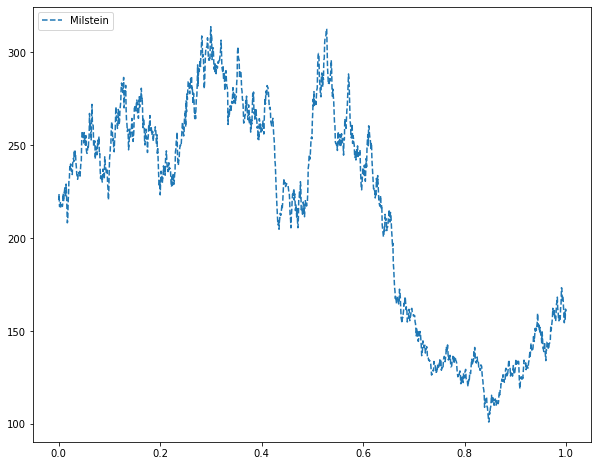

In [135]:
N=len(df1)
seed=5
m = milstein(So, mu, sig, b, N)
t = np.linspace(0,1,N)
plt.plot(t, m, label = 'Milstein', ls ='--')
plt.legend(loc='upper left')

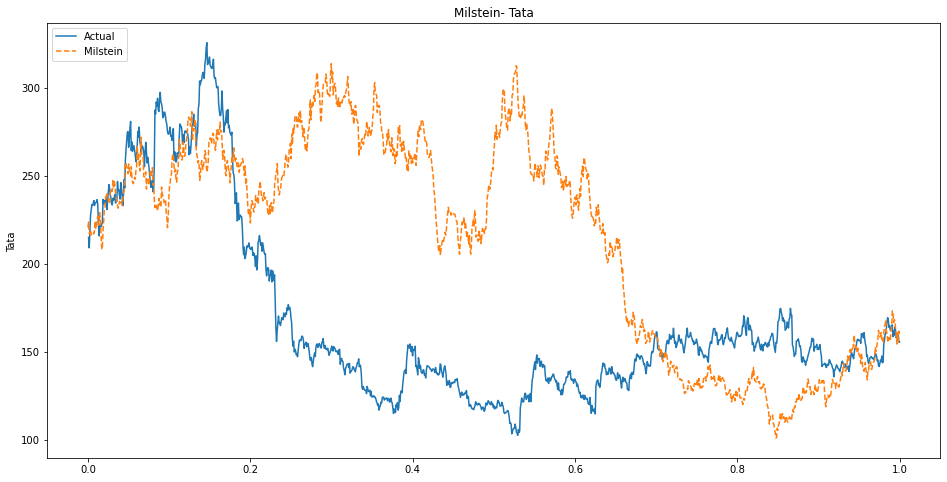

In [136]:
# adjusting the original time array from days to years
time = np.linspace(1, len(close), len(close))
time = [i/len(df1) for i in time]
plt.figure(figsize=(16,8))
plt.plot(time, close, label = 'Actual')
plt.plot(t, m, label = 'Milstein', ls ='--')
plt.ylabel('Tata ')
plt.title('Milstein- Tata')

plt.legend(loc = 'upper left')

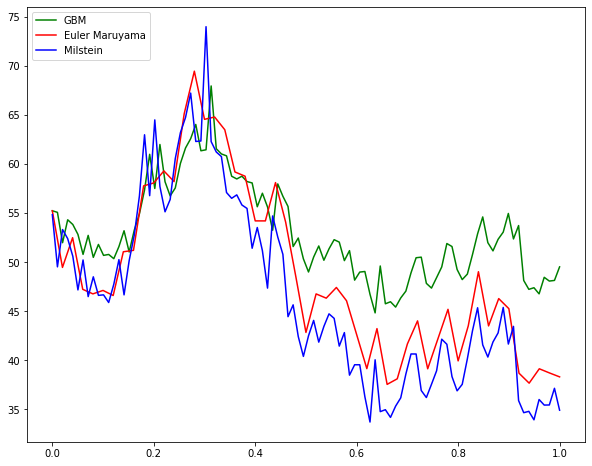

In [54]:
So = 55.25
mu = 0.15
sigma = 0.4
seed = 22
W = Brownian(seed, N)[0]
T = 1
N = 100

soln = GBM(So, mu, sigma, W, T, N)[0]    # Exact solution
t = GBM(So, mu, sigma, W, T, N)[1] # time increments for  plotting

b = Brownian(seed, N)[1]    # Brownian increments 
M = 2                    
L = N//M
EM_approx_1 = EM(So, mu, sig, b, T, N, M)[0]
time_EM_1 = np.linspace(0,1,L+1)


m = milstein(So, mu, sig, b, N)
t = np.linspace(0,1,N)


plt.plot(t, soln,color='g',label='GBM')
plt.plot(time_EM_1, EM_approx_1,color='r',label='Euler Maruyama')
plt.plot(t, m,color='b',label='Milstein')
plt.legend(loc='upper left')
plt.show()

## LSTM:

In [26]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

In [27]:
data = df1.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df1)),columns=['Date', 'Close'])
len(new_data)

1235

In [28]:
for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]

In [29]:
#setting index
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)


In [30]:
new_data

,Close
Date,
2018-10-08,215.15
2018-10-05,209.2
2018-10-04,218.2
2018-10-03,227.6
2018-10-01,230.9
...,...
2013-10-14,159.45
2013-10-11,160.05
2013-10-10,160.15


In [31]:
#creating train and test sets
dataset = new_data.values

train = dataset[0:987,:]
valid = dataset[987:,:]
len(valid)

248

In [32]:
#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

In [33]:
x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)


In [34]:
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [35]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=100))
model.add(Dense(1))

In [36]:
model.compile(loss='mean_squared_error', optimizer='adam',metrics=['mean_squared_error'])
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=1)

927/927 [==============================] - 42s 38ms/step - loss: 0.0064 - mean_squared_error: 0.0064


In [37]:
#predicting 248 values, using past 60 from the train data
inputs = new_data[len(new_data) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)


In [38]:
X_test,y_test = [],[]
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
    y_test.append(inputs[i,0])
X_test,y_test = np.array(X_test),np.array(y_test)


In [39]:
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

In [40]:
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

In [41]:
rmse=np.sqrt(np.mean(np.power((valid-closing_price),2)))
rmse

5.745016193206505

<ipython-input-42-5248e44d5093>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = closing_price


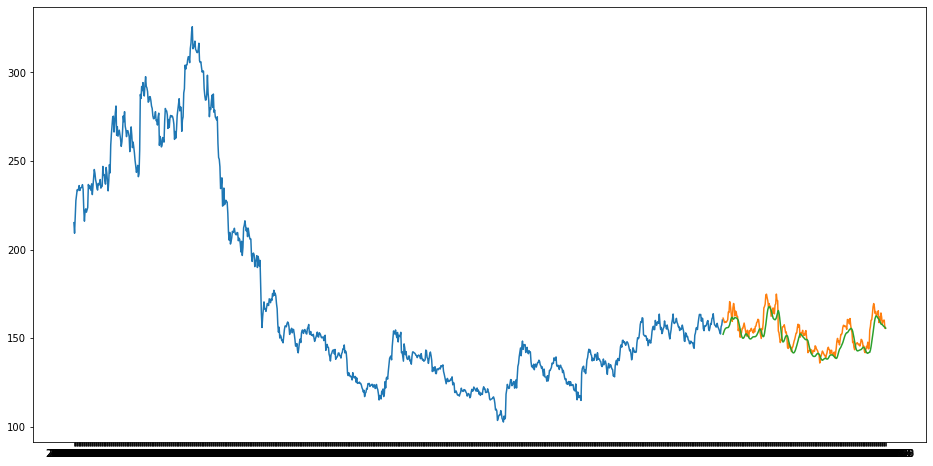

In [42]:
#for plotting
train = new_data[:987]
valid = new_data[987:]
valid['Predictions'] = closing_price
plt.figure(figsize=(16,8))
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.show()



In [43]:
train

,Close
Date,
2018-10-08,215.15
2018-10-05,209.2
2018-10-04,218.2
2018-10-03,227.6
2018-10-01,230.9
...,...
2014-10-17,153.35
2014-10-16,152.35
2014-10-14,156.4


In [44]:
valid

,Close,Predictions
Date,,
2014-10-09,161.25,152.174576
2014-10-08,160.25,153.319641
2014-10-07,158.8,154.400314
2014-10-01,158.85,155.125427
2014-09-30,159.35,155.551941
...,...,...
2013-10-14,159.45,157.190125
2013-10-11,160.05,156.722778
2013-10-10,160.15,156.396210


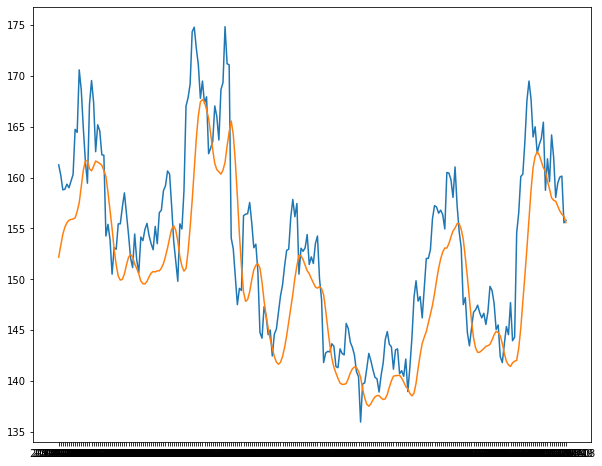

In [45]:
plt.plot(valid[['Close','Predictions']])
plt.show()

## ANN:

In [46]:
from keras.layers import Dropout

In [47]:
x_train.shape
xt=np.reshape(x_train,(x_train.shape[0],x_train.shape[1]))

In [48]:
classifier = Sequential()
classifier.add(Dense(units = 128, kernel_initializer = 'uniform', activation = 'relu', input_dim = x_train.shape[1]))
classifier.add(Dense(units = 128, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 60, kernel_initializer = 'uniform', activation = 'sigmoid'))
classifier.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['mean_squared_error'])
classifier.fit(xt, y_train, batch_size = 10, epochs = 15)

Epoch 1/15
93/93 [==============================] - 1s 2ms/step - loss: 0.0919 - mean_squared_error: 0.0919
Epoch 2/15
93/93 [==============================] - 0s 2ms/step - loss: 0.0033 - mean_squared_error: 0.0033
Epoch 3/15
93/93 [==============================] - 0s 2ms/step - loss: 0.0026 - mean_squared_error: 0.0026
Epoch 4/15
93/93 [==============================] - 0s 2ms/step - loss: 0.0020 - mean_squared_error: 0.0020
Epoch 5/15
93/93 [==============================] - 0s 2ms/step - loss: 0.0016 - mean_squared_error: 0.0016
Epoch 6/15
93/93 [==============================] - 0s 2ms/step - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 7/15
93/93 [==============================] - 0s 2ms/step - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 8/15
93/93 [==============================] - 0s 2ms/step - loss: 0.0010 - mean_squared_error: 0.0010  
Epoch 9/15
93/93 [==============================] - 0s 2ms/step - loss: 0.0016 - mean_squared_error: 0.0016
Epoch 10/15
93/93 [=======

In [49]:
X_test.shape
testx=np.reshape(X_test,(X_test.shape[0],X_test.shape[1]))
y_pred = classifier.predict(testx)
y_pred=scaler.inverse_transform(y_pred)
y_pred1=y_pred[:,0]

<ipython-input-50-26f4d9a04272>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = y_pred1


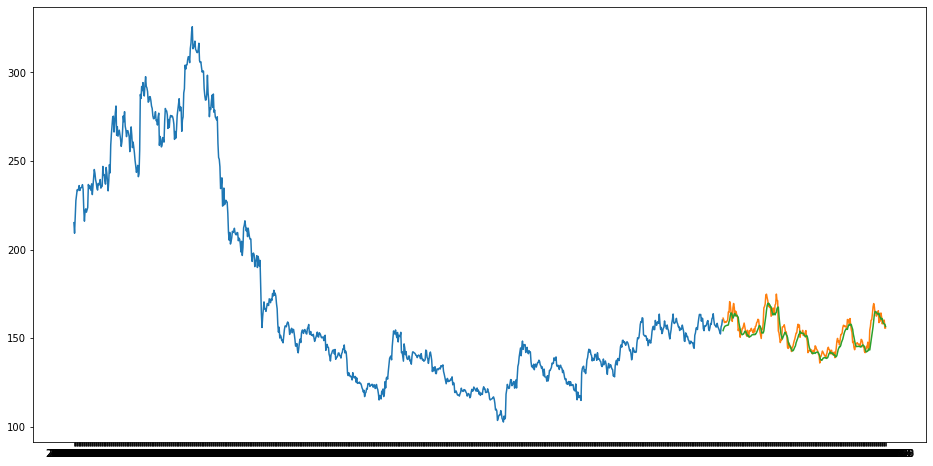

In [50]:
#for plotting
train = new_data[:987]
valid = new_data[987:]
valid['Predictions'] = y_pred1
plt.figure(figsize=(16,8))
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.show()

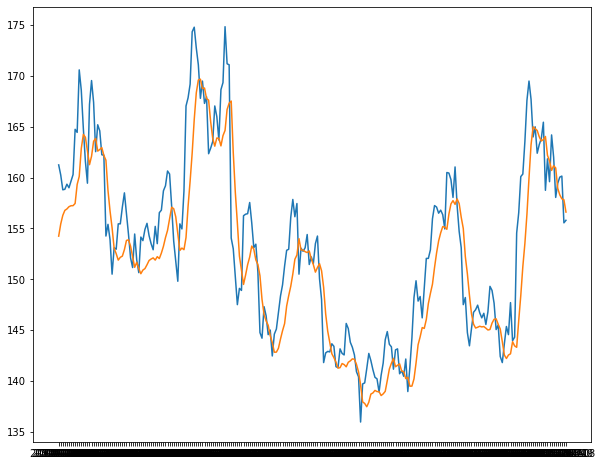

In [51]:
plt.plot(valid[['Close','Predictions']])
plt.show()

In [52]:
valid[['Close','Predictions']]

,Close,Predictions
Date,,
2014-10-09,161.25,154.239670
2014-10-08,160.25,155.443924
2014-10-07,158.8,156.285309
2014-10-01,158.85,156.775543
2014-09-30,159.35,156.914612
...,...,...
2013-10-14,159.45,158.943115
2013-10-11,160.05,158.298370
2013-10-10,160.15,157.912949


In [53]:
rms1=np.sqrt(np.mean(np.power((valid['Close']-y_pred1),2)))
rms1

4.33271837144826

## Observation
Geometric brownian motion is not a good model for predicting stock prices because it assumes

$\bullet$equal proportions of positive and negative shocks

$\bullet$non-overlapping intervals are statistically independent or uncorrelated
a continuous process

$\bullet$In real stock market, positive and negative news don't not come in equal proportion for the targeted investment period, good or bad news can affect stock prices for several days or months and positive or negative shocks can lead to gaps in stock prices, which we have obseverd earlier.
## Conclusion
 We have implemented a Geometric Brownian Motion model in Python for a stochastic differential equation commonly used in quantitative finance.  Although this model has a solution, many do not.  For these models, we have to use numerical methods to find approximations, such as Euler-Maruyama, Milstein. 
 
 We have also used the LSTM model to predict the stock which outperformed the other numerical methods.
 
 
To sum things up, here's a couple of the key takeaways:

1)  A stochastic model can yield any number of different hypothetical paths (predicting stock movements is very difficult).

2)  Numerical models can be used to approximate solutions, but there will always be a tradeoff between computational accuracy and efficiency.

3)  Deep learning models perform better due to its neural networks.